In [2]:
# Import needed libraries and set up plotting style for EDA
import sys
notebook_path = sys.path.append(r'e:\Data science\Titanic dataset\notebooks')

from auto_imports import auto_imports
auto_imports()
# this is a py have all needed functions:
sns.set_style('darkgrid')
"""
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
"""

"\n# Import needed libraries\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport warnings\n\nwarnings.filterwarnings('ignore')\n"

In [3]:
# Load and combine train and test datasets for unified EDA
train_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Raw Data\train.csv')
test_df= pd.read_csv(r'E:\Data science\Titanic dataset\data\Raw Data\test.csv')
train_df['ind'] = 'train'
test_df['ind'] = 'test'
#combine them
df = pd.concat([train_df , test_df])
df.reset_index(drop=True ,inplace=True)

# saving combined data 

df.to_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Analysis\Combined_data.csv' , index=False)

#### EDA

This notebook explores the Titanic dataset, visualizing distributions and relationships between features and the target variable.

In [4]:
# Show info of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  ind          418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [5]:
# Show info of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  ind          891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [6]:
# Count total entries in train and test datasets
train_df.count() + test_df.count()

Age            1046.0
Cabin           295.0
Embarked       1307.0
Fare           1308.0
Name           1309.0
Parch          1309.0
PassengerId    1309.0
Pclass         1309.0
Sex            1309.0
SibSp          1309.0
Survived          NaN
Ticket         1309.0
ind            1309.0
dtype: float64

In [7]:
# Show summary statistics without PassengerId
df.describe().drop('PassengerId' , axis = 1)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


- Proportion of `survived` people is 0.383 and std is 0.486, so This a good std indecates fair amount of variability in the data, so that increases our models accuracy
- All columns have high std, so that indecates vareity in the data, and this good for machine learning models, but age and fare indecate strongly spread or dispersion

In [8]:
#checking duplicates in passengers id
df['PassengerId'].duplicated().value_counts()

PassengerId
False    1309
Name: count, dtype: int64

Ok we don't have any duplicated users

<Axes: xlabel='Age', ylabel='Count'>

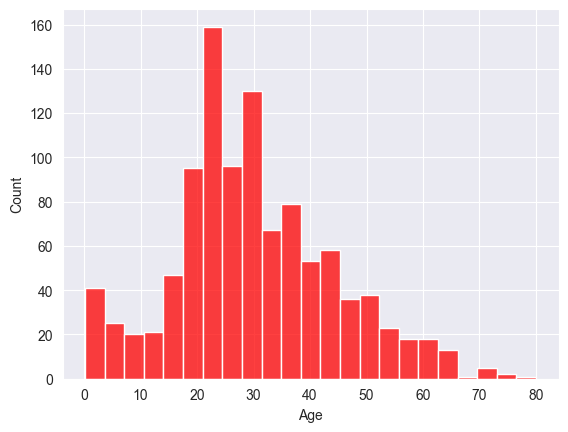

In [9]:
# Plot Age distribution
sns.histplot(df['Age'], color='red')

- Age distribution is normal, so that's mean (mean = mode = median) and the most common ages are between 20 - 40 years old abroad the titanic

- Age distribution wide range and that's proved from age standard deviation = 14.4 approximately from the mean

- So this data have approximately all age ranges but the most age range is youth range


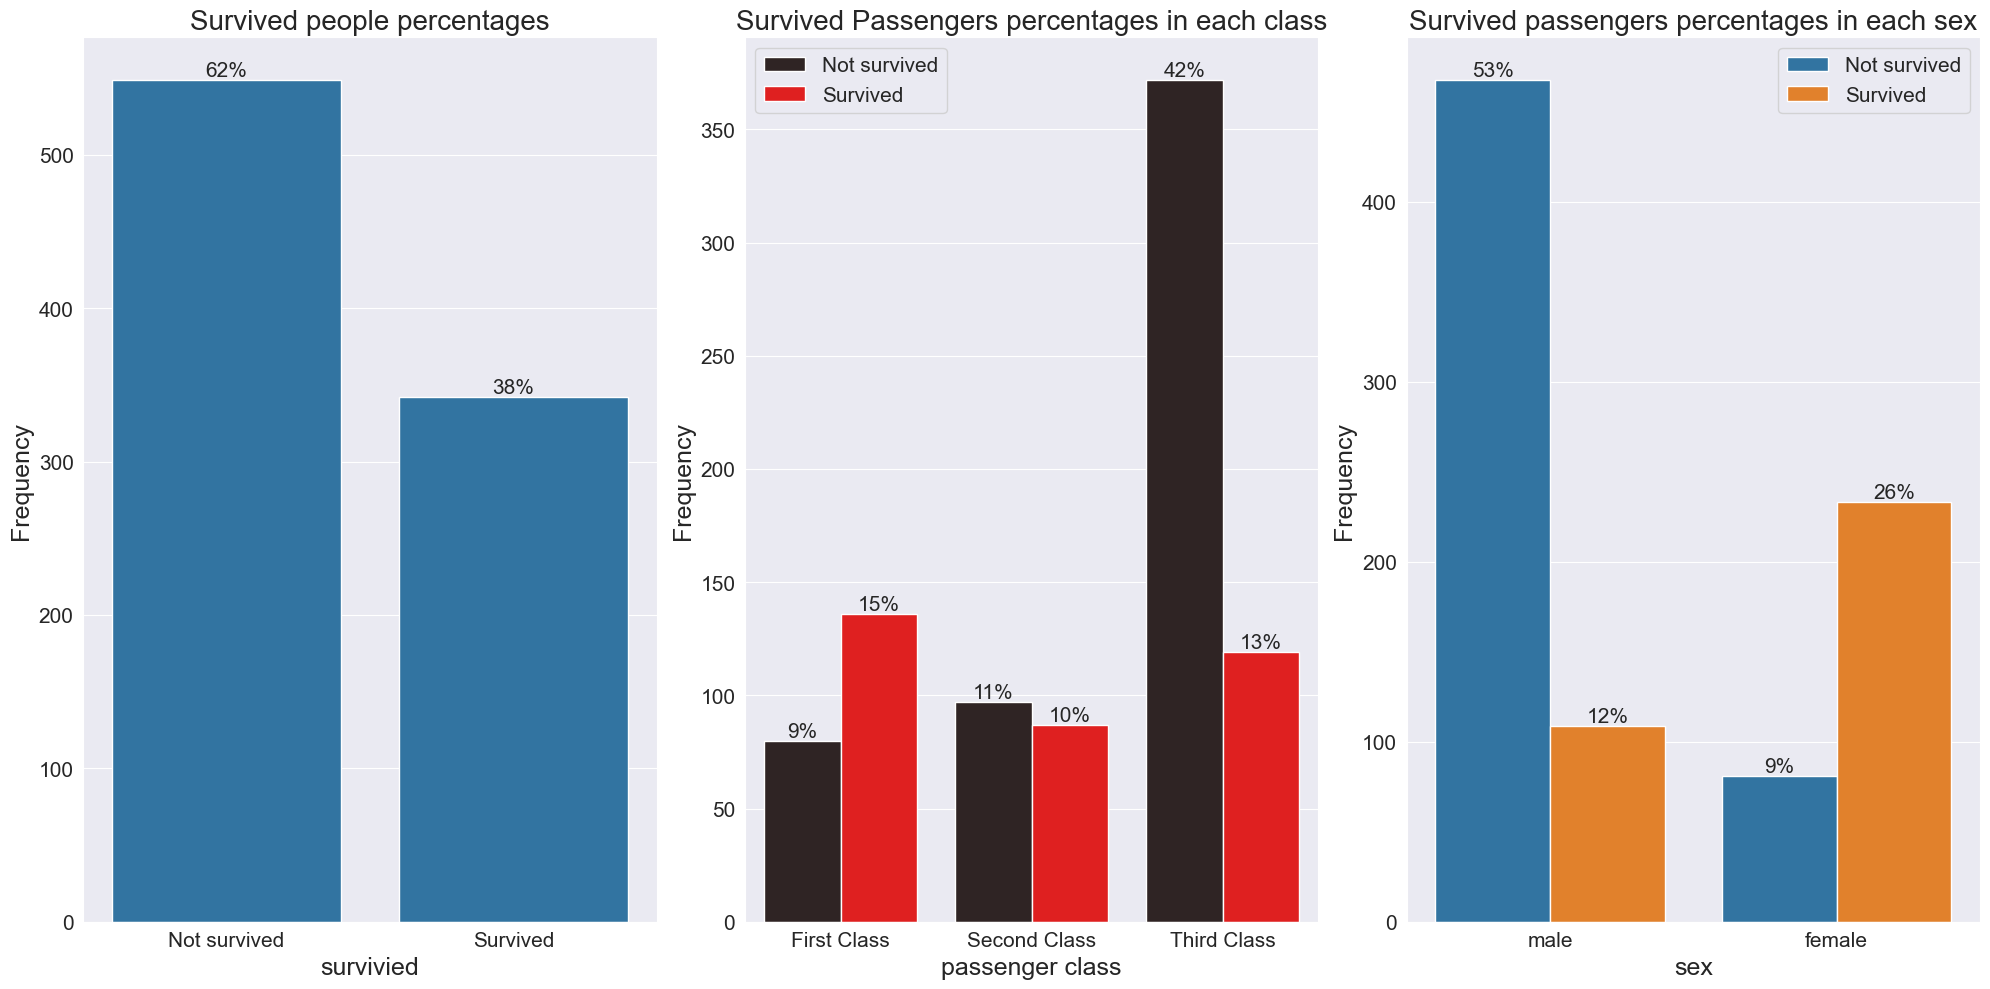

: 

In [ ]:
# Helper function to add percentages above countplot bars and visualize categorical features
def add_percentages(ax:sns.countplot , data_count:int , fontsize: int=None) -> any:
    """Add percentages above each bar in countplot

    Args:
        ax (seaborn.countplot): countplot chart used to add label above each bar
        data_count (int): count of the full data to devide with bar count value and multiply 100
        fontsize (int , None): font size of bar labels. Deafults to None.
    """ 
    for c in ax.containers:
        if fontsize:
            ax.bar_label(c , fmt=lambda x: f'{round(x/data_count*100)}%' , fontsize=fontsize)
        else:
            ax.bar_label(c , fmt=lambda x: f'{x/data_count*100:.0f}%')
        


# plotting survived , Pclass and Sex variables in bar plots
plt.figure(figsize=(20,10))
plt.rc({'size':22}) # set font size
# plotting survived variable
plt.subplot(1,3,1)
survived_ax =sns.countplot(x= train_df['Survived'].astype('O')) # plot the data
add_percentages(survived_ax , train_df.shape[0] , 15 ) # add_percentages above each bar
plt.title('Survived people percentages' , fontdict={'size' : 20}) # giving title to this chart
plt.xlabel('survivied' , fontdict={'size':18}) #x axis label
plt.ylabel('Frequency' , fontdict={'size':18}) #y axis label
plt.xticks(fontsize=15)# axis labels font size
plt.yticks(fontsize=15)# axis labels font size
survived_ax.set_xticklabels(['Not survived' , 'Survived']) # set x axis labels


# plotting Pclass variable
plt.subplot(1,3,2)
Pclass_ax = sns.countplot(x=train_df['Pclass'].astype('O') , color='Red' , hue=train_df['Survived'])
add_percentages(Pclass_ax , train_df.shape[0] , 15 )
plt.title('Survived Passengers percentages in each class' , fontdict={'size' : 20})
plt.xlabel('passenger class' , fontdict={'size':18})
plt.ylabel('Frequency' , fontdict={'size':18})
Pclass_ax.set_xticklabels(['First Class' , 'Second Class' , 'Third Class']) # set x axis labels
plt.xticks(fontsize=15)# axis labels font size
plt.yticks(fontsize=15)# axis labels font size
plt.legend(['Not survived' , 'Survived'] ,fontsize=15)


# Plotting sex variable
plt.subplot(1,3,3)
Sex_ax = sns.countplot(x=train_df['Sex'] , hue=train_df['Survived'])
add_percentages(Sex_ax , train_df.shape[0] , 15)
plt.title('Survived passengers percentages in each sex' , fontdict={'size' : 20})
plt.xlabel('sex' , fontdict={'size':18})
plt.ylabel('Frequency' , fontdict={'size':18})
plt.xticks(fontsize=15)# axis labels font size
plt.yticks(fontsize=15)# axis labels font size
plt.legend(['Not survived' , 'Survived'] ,fontsize=15)
plt.tight_layout()
plt.show()


- Most of the people didn't survive, in third class (the lowest class) and were male
- The second class was the least one in the frequency
- Most of survived people were in the frist and second class and were female

In [11]:
# Show first rows of combined dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


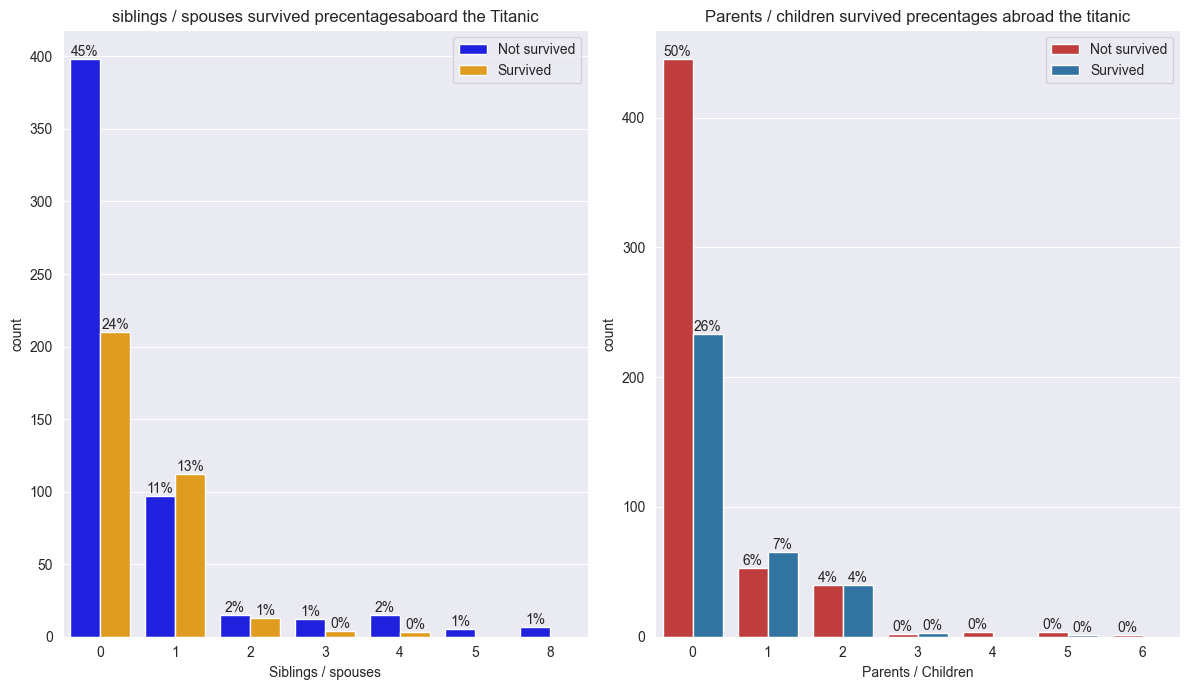

In [55]:
# plotting SibSp and Parch columns in bar plots
plt.figure(figsize=(12,7))
#plotting SibSp column
plt.subplot(1,2,1)
sibsb_ax = sns.countplot(x= train_df['SibSp'] , hue=train_df['Survived'] , palette=['blue' , 'orange'])
plt.title('siblings / spouses survived precentagesaboard the Titanic')
add_percentages(sibsb_ax , train_df.shape[0])
plt.legend(['Not survived' , 'Survived'])
plt.xlabel('Siblings / spouses')

# plotting Prach
plt.subplot(1,2,2)
prach_ax = sns.countplot(x=train_df['Parch'] , hue=train_df['Survived'] , palette=['tab:red' , 'tab:blue'])
plt.title('Parents / children survived precentages abroad the titanic')
plt.legend(['Not survived' , 'Survived'])
add_percentages(prach_ax , train_df.shape[0])
plt.xlabel('Parents / Children')
plt.tight_layout()
plt.show()

- In most cases are individuals or only one sibling / spouse / parent / child, or two siblings / spouses / parents / children
- Also in most cases are siblings / spouses / parents/ children not servived, but if there are 1 or 2 parents / children might survived

Text(0.5, 0, 'Fare($)')

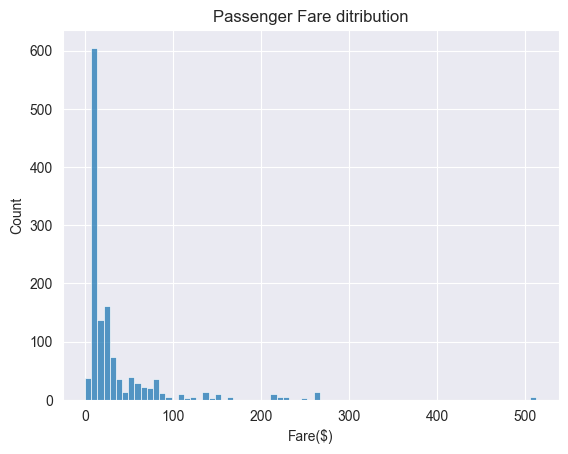

In [13]:
# Plotting fare distribution
sns.histplot(df['Fare'])
plt.title('Passenger Fare ditribution')
plt.xlabel('Fare($)')

Ok I will make two plot the first plot is between 0 - 100 and the second one is above 100

Text(0.5, 0, 'Fare($)')

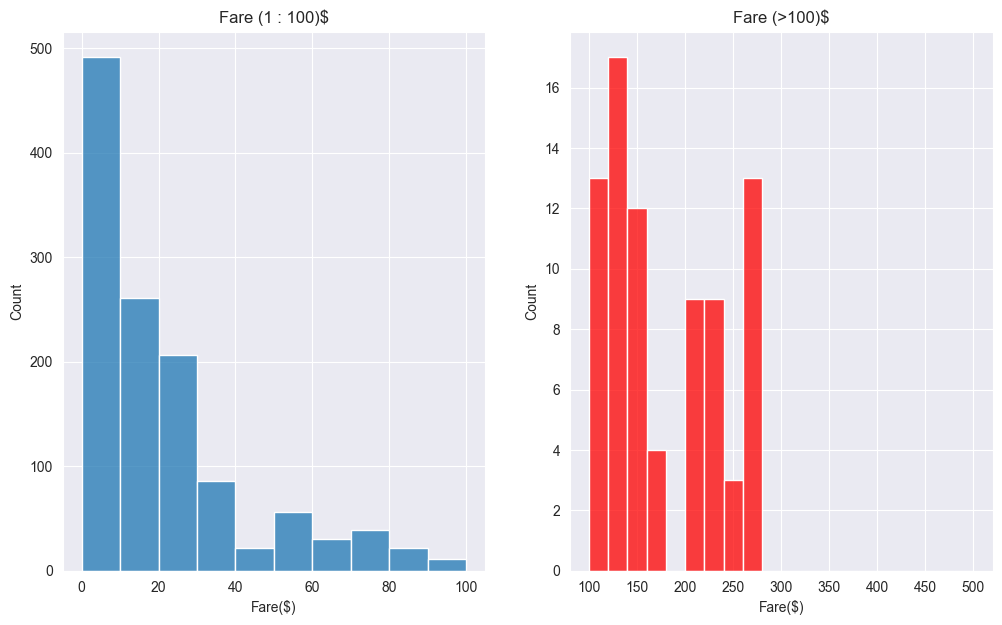

In [59]:
plt.figure(figsize=(12,7))
# Plotting the first plot
plt.subplot(1,2,1)
sns.histplot(df['Fare'], bins=np.arange(0,110 , 10))
plt.title('Fare (1 : 100)$')
plt.xlabel('Fare($)')

# Plotting second one 
plt.subplot(1,2,2)
sns.histplot(df['Fare'] , bins = np.arange(100,520 , 20) , color='red')
plt.title('Fare (>100)$')
plt.xlabel('Fare($)')

- most common fare is between 0 - 10 $
- median fare is between 10 - 20$
- average fare is between 20 - 40$

-  In the another chart (fare>100$)
> This values are outlires and these values are many, so I should benefit from them in the machine learning models

> There are outilires so we should sperate or drop them

<Axes: ylabel='Fare'>

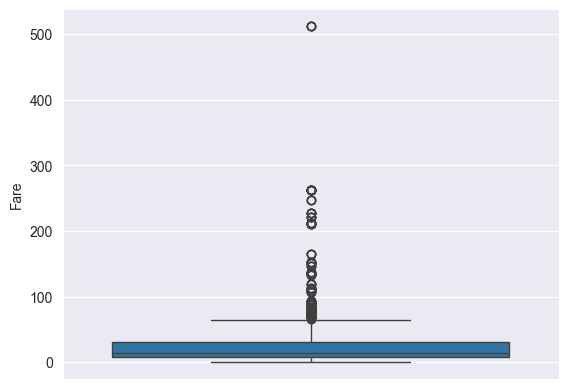

In [15]:
# Ensure of outliers in Fare column
sns.boxplot(df['Fare']) 

There are many outliers, so we should crop them, because of squezing in the box plot

In [16]:
# Let's define what ticket codes say
df['Ticket'].value_counts()

Ticket
CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
                ..
A.5. 3236        1
347086           1
365237           1
334915           1
28666            1
Name: count, Length: 929, dtype: int64

Ticket column have many codes in the column values and these values not unique so I want to see values without characters

> There are duplicated tickets so I think they are shared tickets

In [17]:
# Seeing only numbers without prefixes
only_numbers = df[df['Ticket'].str.match('[0-9]')]['Ticket']
only_numbers.unique()

array(['113803', '373450', '330877', '17463', '349909', '347742',
       '237736', '113783', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', '335677', '113789',
       '2677', '345764', '2651', '7546', '11668', '349253', '330958',
       '370371', '14311', '2662', '349237', '3101295', '2926', '113509',
       '19947', '2697', '2669', '113572', '36973', '347088', '2661',
       '3101281', '315151', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       '3101278', '343275', '343276', '347466', '364500', '374910',
       '231919', '244367', '349245', '349215', '35281', '7540', '3101276',
       '349207', '343120', '312991', '349249', '371110', '110465', '2665',
       '324669', '4136', '2627', '370369', '27267', '370372', '2668',
       '347061', '349241', '228414', '11752', '7534', '2678', '347081',
     

In [18]:
# Count occurrences of tickets with only numbers
only_numbers.value_counts()

Ticket
1601       8
3101295    7
347077     7
347082     7
113781     6
          ..
348125     1
237670     1
2688       1
248726     1
113044     1
Name: count, Length: 705, dtype: int64

There are different lengthes of the values, so I should the reason in some duscussions and articles

In [19]:
# See only prefixes in Ticket column
only_prefixes = df['Ticket'].str.extract(r'^([A-Za-z/.]+\d*)', expand=False).fillna('Non-special').replace('[.]' , '' , regex=True) # Getting only prefixes with regex statement
only_prefixes.unique()

array(['A/5', 'PC', 'STON/O2', 'Non-special', 'PP', 'CA', 'SC/Paris',
       'SC/A4', 'A/4', 'SP', 'SOC', 'SO/C', 'W/C', 'SOTON/OQ', 'WEP',
       'STON/O', 'A4', 'C', 'SC/PARIS', 'SOP', 'A5', 'Fa', 'LINE', 'FCC',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'WE/P', 'SO/PP',
       'FC', 'SOTON/O2', 'CA/SOTON', 'SC/A3', 'STON/OQ', 'AQ/4', 'A',
       'LP', 'AQ/3'], dtype=object)

In [20]:
# Count occurrences of ticket prefixes
only_prefixes.value_counts()

Ticket
Non-special    957
PC              92
CA              68
A/5             25
SOTON/OQ        24
W/C             15
STON/O          14
SC/PARIS        14
A/4              9
FCC              9
C                8
SOC              7
STON/O2          7
SO/PP            7
SC/AH            5
SC/Paris         5
PP               4
LINE             4
SOTON/O2         3
A5               3
FC               3
SC/A4            2
SW/PP            2
WEP              2
WE/P             2
P/PP             2
SC               2
Fa               1
A4               1
SP               1
SOP              1
SO/C             1
SCO/W            1
A/S              1
CA/SOTON         1
SC/A3            1
STON/OQ          1
AQ/4             1
A                1
LP               1
AQ/3             1
Name: count, dtype: int64

In [21]:
# Show ticket prefixes that are not 'Non-special'
only_prefixes[only_prefixes != 'Non-special'] # There 352 entry have prefixes in them

0            A/5
1             PC
2        STON/O2
10            PP
12           A/5
          ...   
1296    SC/PARIS
1300    SOTON/OQ
1304          A5
1305          PC
1306    SOTON/OQ
Name: Ticket, Length: 352, dtype: object

There many duplicated prefixes, so in my opinion these are special agents or routes and big precentage of them prove my opinion

In [22]:
# Show random sample of combined dataframe
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
616,617,0.0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S,train
116,117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,train
512,513,1.0,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,train
145,146,0.0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,train
343,344,0.0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S,train


I want to see there are difference between the Pclass value and first digit of the ticket using $chi^2 contingency$


$$H_0: Pclass - FDT = 0$$
$$H_1: Pcalass - FDT \neq 0$$

> FDT --> First Digit of the Ticket

$chi^2 contingency$ method is a method compare frequecnies of categorical data and return p-value
> p-value < 0.05 --> there are significant relationship between them<br>
> p-value => 0.05 --> there aren't significant relationship between them<br>

In [23]:
# Prepare contingency table for chi2 test between Pclass and first digit of Ticket
from scipy.stats import chi2_contingency
import re
first_digit = df['Ticket'].str.extract(r'(\d)' , expand=False)

first_digit_mask = first_digit.notna()
contingency_table = pd.crosstab(df.loc[first_digit_mask , 'Pclass'] , first_digit[first_digit_mask])

In [24]:
# Show contingency table
contingency_table

Ticket,1,2,3,4,5,6,7,8,9
Pclass,,,,,,,,,
1,288,8,18,0,5,4,0,0,0
2,32,204,38,0,1,0,2,0,0
3,17,149,436,30,31,17,18,2,5


In [25]:
# Run chi2 test
chi2 , pval , dof , excepted = chi2_contingency(contingency_table)

In [26]:
# Show rounded p-value
round(pval , 4)

np.float64(0.0)

We reject null, so there are statistically significant relationship between them, so there aren't any defference bewtween them

After reading some discussions I think we can make new features like:
- FirstDigitTicket ---> We ensure that Pclass and First Digit in ticket number are the same, but I won't make this feature becuase of the similarity
- TicketPrefix ---> It may refer to special booking route/agent
- TicketNumberDigits ---> It may refer to Batch/timeframe when ticket issued 
- SharedTicketNumbers ---> It may refer to groups or Families traveling together
> I will drop raw ticket data

In [27]:
# Take a look on cabin values
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
# Get cabins without cell number
df[~df['Cabin'].str.contains(r'\d', na=False)].dropna() # Getting only cabin without cell number

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
292,293,0.0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C,train
327,328,1.0,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,train
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,train
473,474,1.0,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C,train


There are only 4 values without cell number, so I think dropping them is good

In [29]:
# Get cabins without cabin letter
df[~df['Cabin'].str.contains(r'[A-Za-z]', na=False)].dropna() # Getting only cabin without cabin letter

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind


That's good there aren't any values without cabin letters

Ok I think it will better if I sperate this column to cabin_letter and cell_number

Looking at names contain brackets

In [30]:
# Find names with brackets (usually female maiden names)
name_mask = df['Name'].str.contains(r'\((.*?)\)')

# store it to the kerenl to feature engineering
%store name_mask
# apply the mask to see names with brackets
brackets_name = df.loc[name_mask]
brackets_name.head()

Stored 'name_mask' (Series)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,train
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,train
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,train


In [31]:
# Show unique names with brackets
brackets_name['Name'].unique().tolist()

['Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Spencer, Mrs. William Augustus (Marie Eugenie)',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)',
 'Arnold-Franchi, Mrs. Josef (Josefine Franchi)',
 'Harper, Mrs. Henry Sleeper (Myna Haxtun)',
 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)',
 'Nye, Mrs. (Elizabeth Ramell)',
 'Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)',
 'Doling, Mrs. John T (Ada Julia Bone)',
 'Petroff, Mr. Pastcho ("Pentcho")',
 'Robins, Mrs. Alexander A (Grace Charity Laury)',
 'Weisz, Mrs. Leopold (Mathilde Francoise Pede)',
 'Boulos, Mrs. Joseph (Sultana)',
 'Hakkarainen, Mrs. Pek

- Ok there are names with brackets and qoutes, so these may be second name or something like that
- There are female names contains madian name in the brackets

In [32]:
# Count male/female for names with brackets
brackets_name['Sex'].value_counts()

Sex
female    201
male       20
Name: count, dtype: int64

Ok most of Names have brackets is females, so it may refer to madian name or their real name before marriage

In [33]:
# Showing male names with brackets
male_brackets_name = brackets_name.query('`Sex` == "male"')['Name']
%store male_brackets_name
male_brackets_name

Stored 'male_brackets_name' (Series)


101                      Petroff, Mr. Pastcho ("Pentcho")
146          Andersson, Mr. August Edvard ("Wennerstrom")
148              Navratil, Mr. Michel ("Louis M Hoffman")
187         Romaine, Mr. Charles Hallace ("Mr C Rolmane")
227                       Lovell, Mr. John Hall ("Henry")
429                    Pickard, Mr. Berk (Berk Trembisky)
507         Bradley, Mr. George ("George Arthur Brayton")
553                     Leeni, Mr. Fahim ("Philip Zenni")
572                      Flynn, Mr. John Irwin ("Irving")
599          Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
604                       Homer, Mr. Harry ("Mr E Haven")
705        Morley, Mr. Henry Samuel ("Mr Henry Marshall")
709     Moubarek, Master. Halim Gonios ("William George")
785                    Harmer, Mr. Abraham (David Lishin)
926      Katavelas, Mr. Vassilios (Catavelas Vassilios")"
999                      Willer, Mr. Aaron (Abi Weller")"
1035    Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...
1177          

Ok I want to see if these names in our data or not (pentcho,...)

In [34]:
# Extract bracketed content from male names
male_names = male_brackets_name.str.extract('\((.*?)\)')[0].str.replace('"' , '').str.strip().to_list()

In [35]:
# Query if bracketed male names are in the dataset
df.query('Name in @male_names')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind


Ok All of these names aren't in our data, so I think these nicknames of Them


> So in feature Enigneering I will sperate name to three columns (family name , Title)

In [36]:
# See importance of these males if they are important, I will keep them. Otherwise I will drop them

df.query('`Name` in @male_brackets_name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
101,102,0.0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,train
146,147,1.0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,train
148,149,0.0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,train
187,188,1.0,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,train
227,228,0.0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S,train
429,430,1.0,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,train
507,508,1.0,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,train
553,554,1.0,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,train
572,573,1.0,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S,train
599,600,1.0,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,train


I want to see If these values are from outlires or not

In [37]:
# Splitting outliers values and non ones for Fare
Q1_F = df['Fare'].quantile(0.25) # Q1 of Fare column
Q3_F = df['Fare'].quantile(0.75) # Q3 of Fare column
IQR = Q3_F - Q1_F

outliers = df[
    (df['Fare'] > (IQR * 1.5 + Q3_F)) | 
    (df['Fare'] < (IQR * 1.5 - Q1_F))
]
%store outliers
outliers

Stored 'outliers' (DataFrame)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [38]:
# Count how many male bracket names are outliers
df.query('`Name` in @male_brackets_name').index.isin(outliers.index).sum()

np.int64(19)

90% of them are outlires so I will drop all of them in data cleaing

In [39]:
# Getting value counts of family names
df['Name'].str.split(',').str[0].str.strip().value_counts()

Name
Andersson    11
Sage         11
Asplund       8
Goodwin       8
Davies        7
             ..
Beesley       1
Sloper        1
Emir          1
Hipkins       1
Wheeler       1
Name: count, Length: 875, dtype: int64

There are people from the same family, so I will make column called family name

#### Summary

- This notebook provides a comprehensive EDA of the Titanic dataset, including feature distributions, relationships, and ideas for feature engineering.
- Insights from this analysis guide the feature engineering and modeling steps in subsequent notebooks.